In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np 
import datetime as dt 
import yfinance as yf 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
import matplotlib.dates as mdates
!pip install openpyxl

In [2]:
#Importing historical weekly stock data of NTPC.ltd for the last two years from https://www.investing.com/ 
stock_NTPC = pd.read_csv("NTPC Historical Data.csv")
stock_NTPC["Change %"] = stock_NTPC["Price"].pct_change(1)*100
stock_NTPC['Change %'] = stock_NTPC["Change %"].replace(np.nan,0)
stock_NTPC.round(2)

,Date,Price,Open,High,Low,Vol.,Change %
0,01-02-2022,131.35,125.40,133.30,124.70,76.00,0.00
1,01-09-2022,135.35,131.95,136.65,130.75,54.20,3.05
2,01/16/2022,134.10,134.65,137.75,132.55,58.32,-0.92
3,01/23/2022,140.15,133.00,144.00,131.00,77.06,4.51
4,01/30/2022,134.20,142.00,144.15,133.90,72.91,-4.25
...,...,...,...,...,...,...,...
135,08-04-2024,410.65,407.65,424.95,404.65,103.68,-2.16
136,08-11-2024,398.05,410.00,410.00,393.30,60.88,-3.07
137,08/18/2024,401.95,402.30,410.05,399.55,52.49,0.98
138,08/25/2024,416.20,402.45,419.20,401.95,79.75,3.55


In [3]:
#Defining a function to plot charts for any stock_data which is imported
def plot_financial_data(df,title):
  fig_NTPC = px.line(title = title)
  color_map = {"Price": "Red", "Open": "Cyan", "High": "Green", "Low": "Grey"}
  for i in df.columns[1:]:
    fig_NTPC.add_scatter(x = df["Date"], y = df[i],
                         mode = "lines",
                         name = i,
                         line = dict(color = color_map.get(i,)))
    fig_NTPC.update_traces(line_width = 4)
    fig_NTPC.update_layout({'plot_bgcolor' : 'white',
                            'width': 1000,
                            'height': 550})
  fig_NTPC.show()

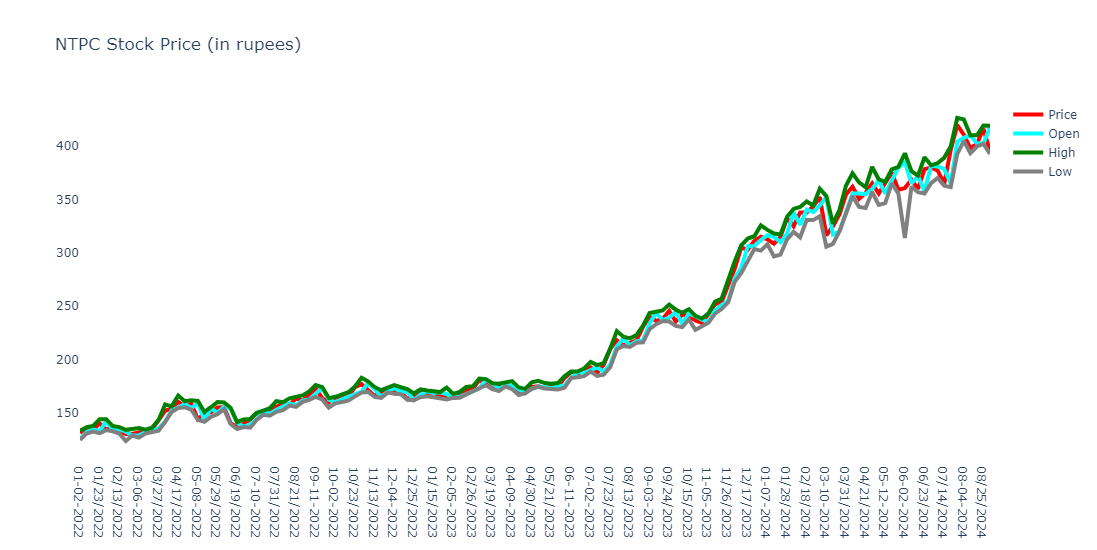

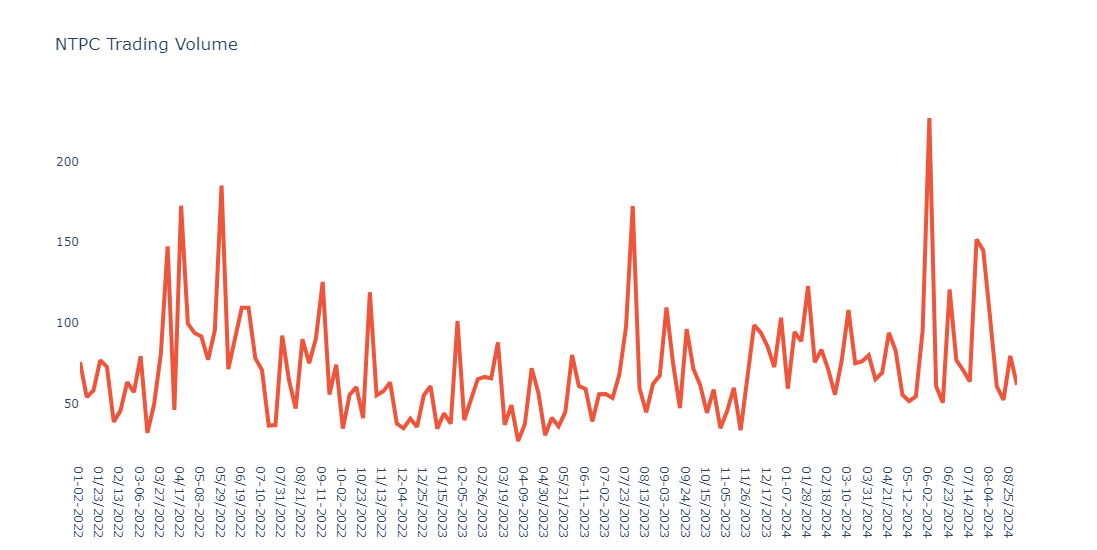

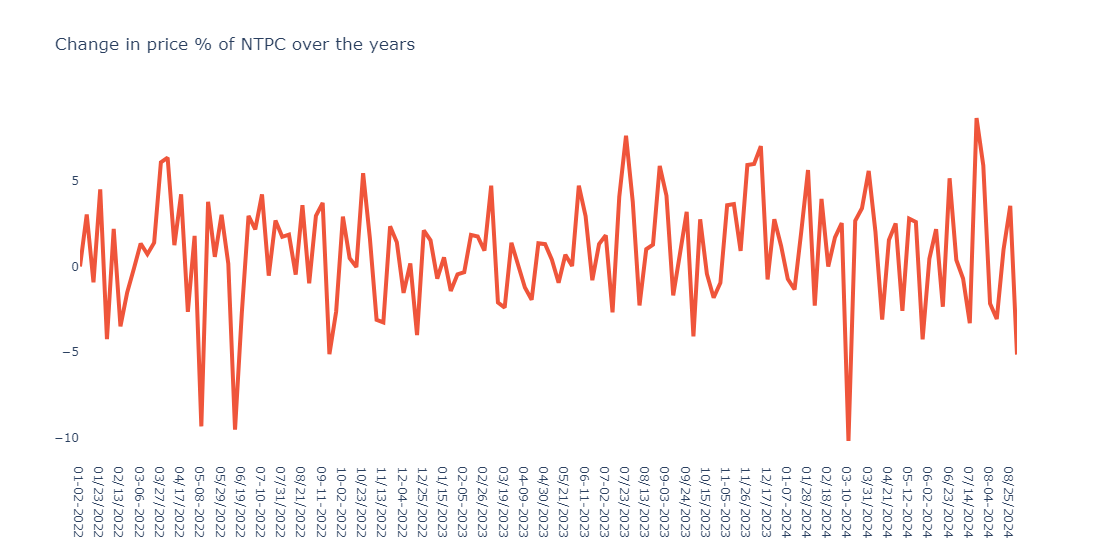

In [4]:
#Plotting various charts to manipulate and visualise the data
plot_financial_data(stock_NTPC.iloc[:,[0,1,2,3,4]], 'NTPC Stock Price (in rupees)')
plot_financial_data((stock_NTPC.iloc[:,[0,5]]),'NTPC Trading Volume')
plot_financial_data((stock_NTPC.iloc[:,[0,6]]),'Change in price % of NTPC over the years')

In [5]:
#Defining a trend classifier function to ascertain the changes in stock prices are significant to perform analysis
def percentage_return_classifier(percentage_return):
    
    if percentage_return > -0.5 and percentage_return <= 0.5:
        return 'Insignificant Change'
    elif percentage_return > 0.3 and percentage_return <= 3:
        return 'Positive Change'
    elif percentage_return > -3 and percentage_return <= -0.5:
        return 'Negative Change'
    elif percentage_return > 3 and percentage_return <= 7:
        return 'Significant Positive Change'
    elif percentage_return > -7 and percentage_return <= -3:
        return 'Significant Negative Change'
    elif percentage_return > 7:
        return 'Huge momemtum Run'
    elif percentage_return <= -7:
        return 'Huge Sell Off'      

<Axes: ylabel='count'>

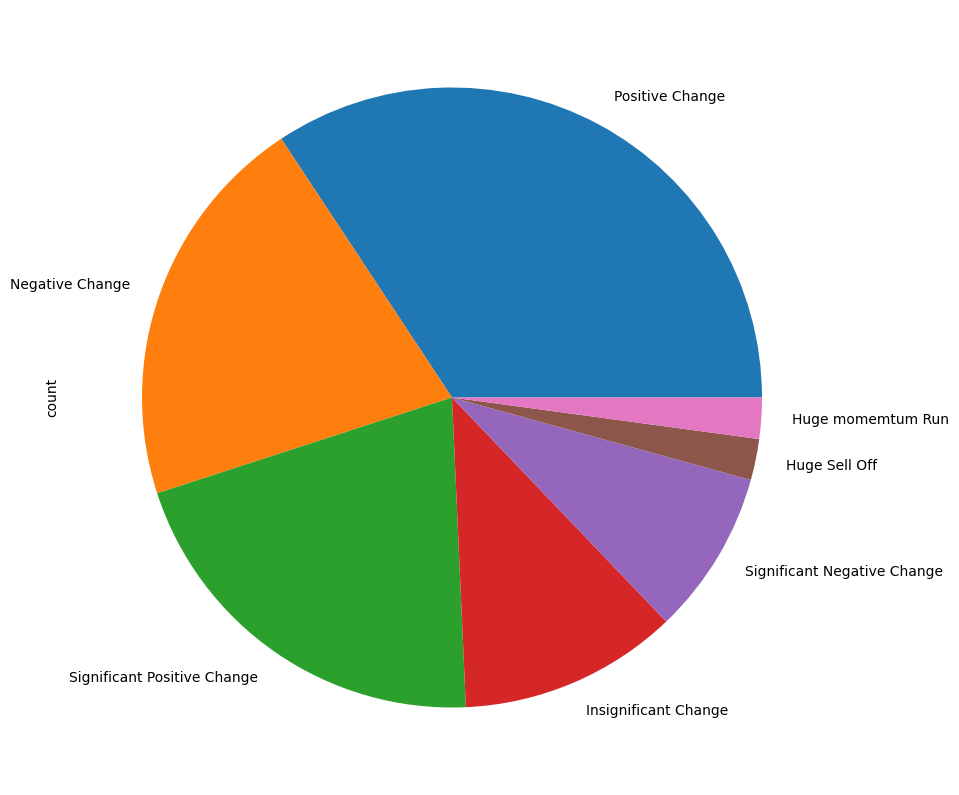

In [6]:
#Plotting the trend patterns of the stock price changes
stock_NTPC["Trend"] = stock_NTPC["Change %"].apply(percentage_return_classifier)
trend_summary_NTPC = stock_NTPC["Trend"].value_counts()
plt.figure(figsize=(10,15))
trend_summary_NTPC.plot(kind = "pie", y = "Trend")

In [7]:
#Manipulating the data in df to make it suitable to create candlestick charts
stock_NTPC_index_date = stock_NTPC.set_index(["Date"],inplace = False)
stock_NTPC_index_date['Close'] = stock_NTPC_index_date["Price"]
stock_NTPC_index_date = stock_NTPC_index_date.reindex(['Open', 'High', "Low", 'Close', "Volume", "Change %", "Price"], axis='columns')
stock_NTPC_index_date

,Open,High,Low,Close,Volume,Change %,Price
Date,,,,,,,
01-02-2022,125.40,133.30,124.70,131.35,NaN,0.000000,131.35
01-09-2022,131.95,136.65,130.75,135.35,NaN,3.045299,135.35
01/16/2022,134.65,137.75,132.55,134.10,NaN,-0.923532,134.10
01/23/2022,133.00,144.00,131.00,140.15,NaN,4.511559,140.15
01/30/2022,142.00,144.15,133.90,134.20,NaN,-4.245451,134.20
...,...,...,...,...,...,...,...
08-04-2024,407.65,424.95,404.65,410.65,NaN,-2.156302,410.65
08-11-2024,410.00,410.00,393.30,398.05,NaN,-3.068306,398.05
08/18/2024,402.30,410.05,399.55,401.95,NaN,0.979776,401.95


In [8]:
#Plotting a candlestick chart for the stock to perform technical analysis
figure = cf.QuantFig(stock_NTPC_index_date, title = 'NTPC Candlestick Chart', name = 'NTPC')
figure.iplot(theme= "white" , up_color= "green" , down_color= "red" )
figure.layout['width'] = 3000
figure.layout['height'] = 9000
figure.add_bollinger_bands(20,2,color = ["red","green"])
#For our candlestick chart, we need the values Open, High, Low, and Close in that exact order
#Also, we will need Date for our x-axis

In [9]:
#Importing various stock data from excel files, consists of 5 stock - NTPC, DIVI, PAYT, HIAE, KPIE, LART
stock_pf = pd.read_excel("Stocks_portfolio.xlsx")
daily_returns_stock_pf = stock_pf.iloc[:, 1:].pct_change() * 100
daily_returns_stock_pf.replace(np.nan,0,inplace = True)
stock_pf

,Date,NTPC,DIVI,PAYT,HIAE,KPIE,LART
0,2022-01-03,126.00,4651.25,1339.80,616.85,608.15,1922.85
1,2022-01-04,132.90,4621.70,1317.75,624.30,608.15,1937.55
2,2022-01-05,132.00,4558.45,1288.35,634.85,594.20,1948.60
3,2022-01-06,130.90,4489.15,1254.05,624.17,630.45,1924.50
4,2022-01-07,131.35,4516.70,1231.60,628.30,711.25,1904.90
...,...,...,...,...,...,...,...
655,2024-08-26,414.85,4926.25,530.40,4802.00,1846.60,3641.90
656,2024-08-27,409.65,4902.50,545.15,4721.45,1856.85,3702.70
657,2024-08-28,409.05,5030.70,538.00,4685.15,1847.05,3689.05
658,2024-08-29,409.90,5012.55,554.50,4601.95,1857.85,3683.45


In [10]:
#Manipulating data in df to make the data usable for the specific functions
daily_returns_stock_pf.insert(0, "Date", stock_pf['Date'])
daily_returns_stock_pf

,Date,NTPC,DIVI,PAYT,HIAE,KPIE,LART
0,2022-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022-01-04,5.476190,-0.635313,-1.645768,1.207749,0.000000,0.764490
2,2022-01-05,-0.677201,-1.368544,-2.231076,1.689893,-2.293842,0.570308
3,2022-01-06,-0.833333,-1.520254,-2.662320,-1.682287,6.100640,-1.236785
4,2022-01-07,0.343774,0.613702,-1.790200,0.661679,12.816242,-1.018446
...,...,...,...,...,...,...,...
655,2024-08-26,3.209354,1.447708,-4.406596,-0.430252,1.100465,1.204652
656,2024-08-27,-1.253465,-0.482111,2.780920,-1.677426,0.555074,1.669458
657,2024-08-28,-0.146466,2.614992,-1.311566,-0.768832,-0.527776,-0.368650
658,2024-08-29,0.207799,-0.360785,3.066914,-1.775824,0.584716,-0.151801


In [11]:
#Defining a function price_scaling to improve comparability among the various stocks to enhance analysis
def price_scaling(raw_prices_df):
    scaled_prices_df = raw_prices_df.copy()
    for i in raw_prices_df.columns[1:]:
          scaled_prices_df[i] = raw_prices_df[i]/raw_prices_df[i][0]
    return scaled_prices_df

In [12]:
stock_pf_scaled = price_scaling(stock_pf)
stock_pf_scaled

,Date,NTPC,DIVI,PAYT,HIAE,KPIE,LART
0,2022-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2022-01-04,1.054762,0.993647,0.983542,1.012077,1.000000,1.007645
2,2022-01-05,1.047619,0.980048,0.961599,1.029181,0.977062,1.013392
3,2022-01-06,1.038889,0.965149,0.935998,1.011867,1.036669,1.000858
4,2022-01-07,1.042460,0.971072,0.919242,1.018562,1.169531,0.990665
...,...,...,...,...,...,...,...
655,2024-08-26,3.292460,1.059124,0.395880,7.784713,3.036422,1.894011
656,2024-08-27,3.251190,1.054018,0.406889,7.654130,3.053276,1.925631
657,2024-08-28,3.246429,1.081580,0.401552,7.595282,3.037162,1.918532
658,2024-08-29,3.253175,1.077678,0.413868,7.460404,3.054921,1.915620


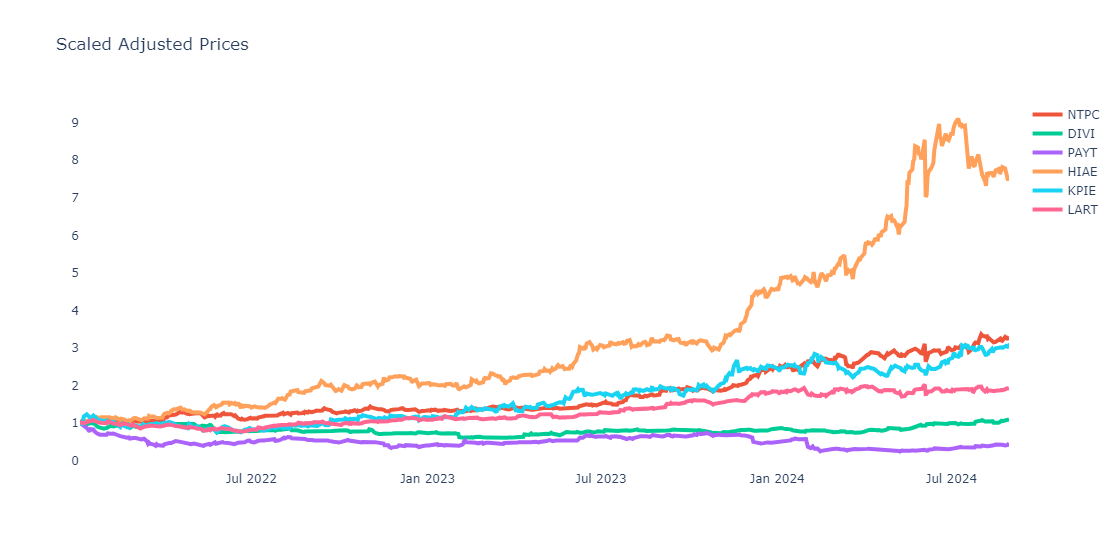

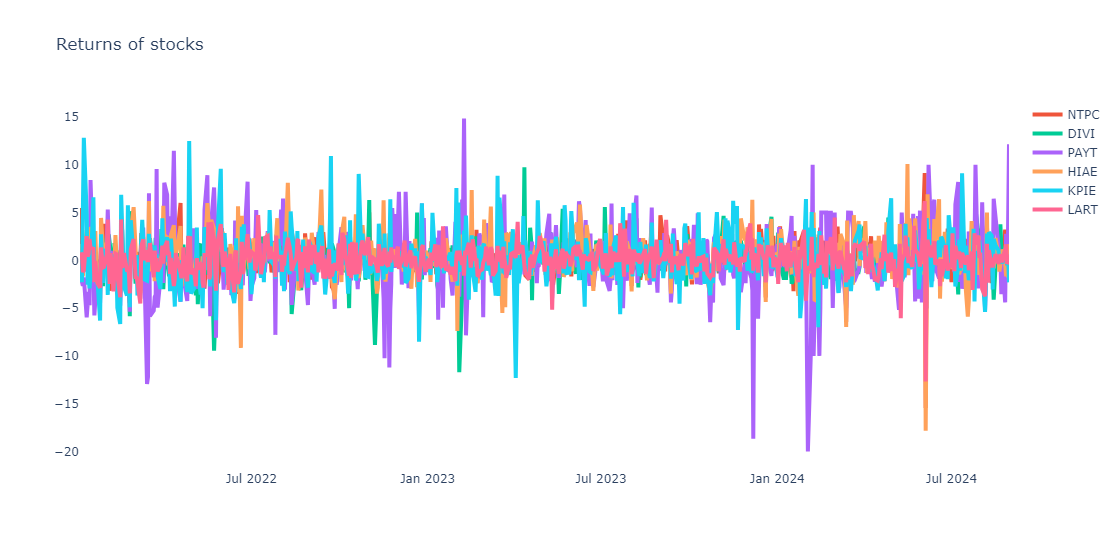

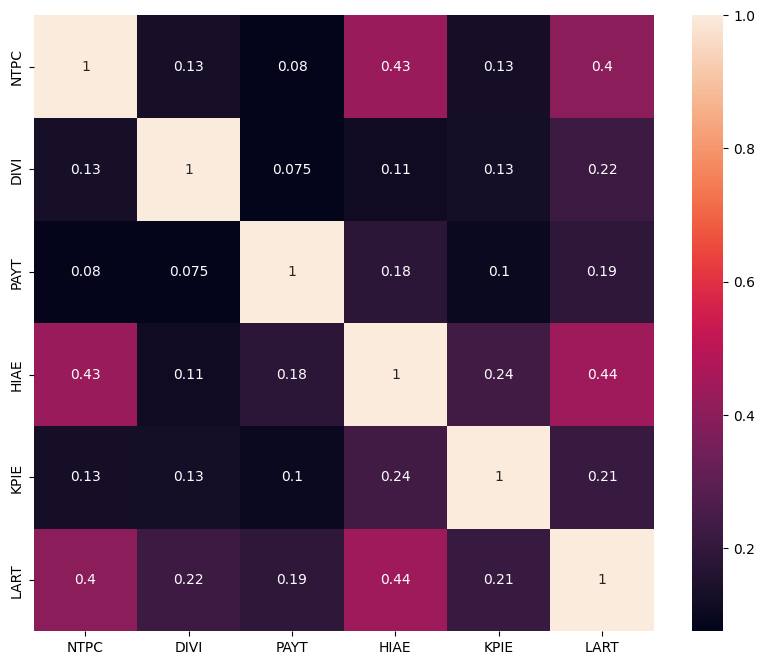

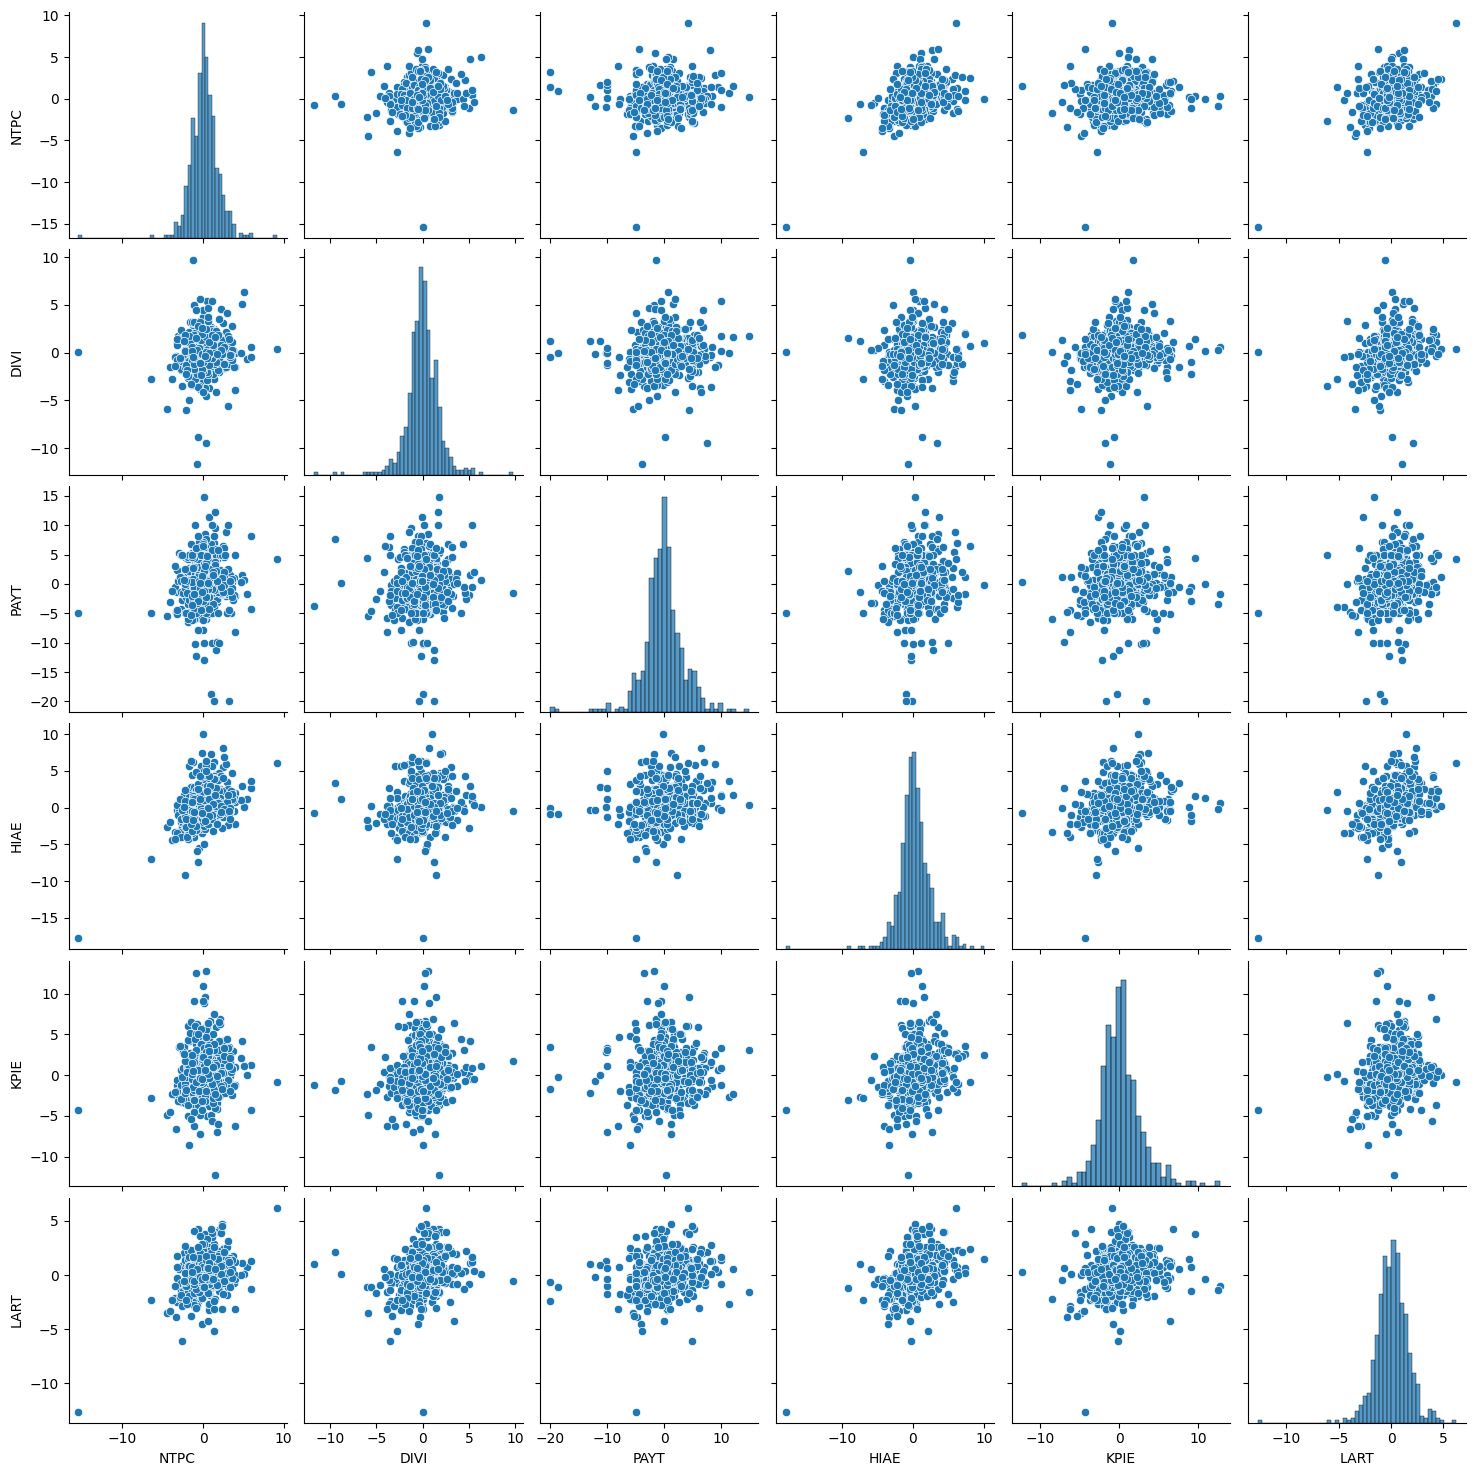

In [13]:
#Plotting several graphs for data visualization 
plot_financial_data(stock_pf_scaled, "Scaled Adjusted Prices")
plot_financial_data(daily_returns_stock_pf,"Returns of stocks")
fig = px.histogram(daily_returns_stock_pf.drop(columns = ['Date']))
fig.update_layout({'plot_bgcolor': "white"})
plt.figure(figsize = (10, 8))
sns.heatmap(daily_returns_stock_pf.drop(columns = ['Date']).corr(), annot = True,);
sns.pairplot(daily_returns_stock_pf)